In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
base_dir = "/home/mafzhang/code/Project/CHLA-Imputation-and-Prediction-for-Bay/log/prediction/PRE/"

In [3]:
label = np.load("/home/mafzhang/data/PRE/8d/trues.npy")
label_masks = np.load("/home/mafzhang/data/PRE/8d/true_masks.npy")

In [4]:
prediction_our = np.load(base_dir+"GraphTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_weekly = np.load(base_dir+"weekly_climatology/prediction.npy")
prediction_monthly = np.load(base_dir+"monthly_climatology/prediction.npy")

In [5]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

In [6]:
prediction_our = torch.from_numpy(prediction_our).squeeze()
prediction_weekly = torch.from_numpy(prediction_weekly)
prediction_monthly = torch.from_numpy(prediction_monthly)

In [7]:
is_sea2 = np.load("/home/mafzhang/code/Project/STIMP/data/PRE/is_sea_2.npy")
is_sea = np.load("/home/mafzhang/code/Project/STIMP/data/PRE/is_sea.npy")
tmp = is_sea2[is_sea.astype(bool)].astype(bool)
label = label[:,:,tmp]
label_masks = label_masks[:,:,tmp]
prediction_our = prediction_our[:,:,:,tmp]
prediction_monthly = prediction_monthly[:,:,tmp]
prediction_weekly = prediction_weekly[:,:,tmp]

In [8]:
mse_our= (((prediction_our.mean(1)- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_our))


mse_weekly = (((prediction_weekly - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_monthly = (((prediction_monthly- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mse_weekly))
print(np.nanmean(mse_monthly))


0.070237435
0.0853331522367091
0.07903061542068927


In [9]:
mse_our[mse_our==0]=np.nan
mse_weekly[mse_weekly==0]=np.nan
mse_monthly[mse_monthly==0]=np.nan

0.0853331522367091
0.07903061542068927
['#4E5E7B', '#80AE6B', '#F8766D']


/tmp/ipykernel_160559/1913088773.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={


([], [])

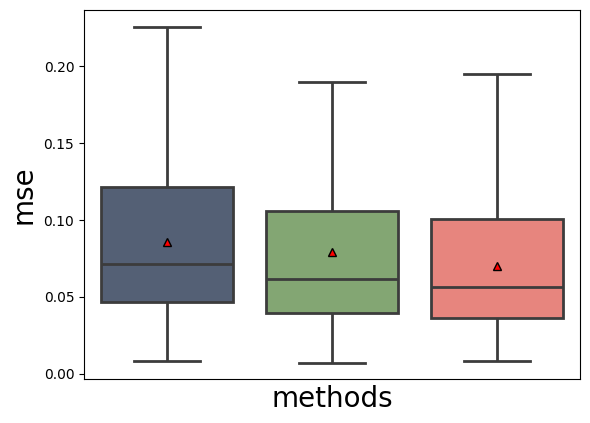

In [12]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

category = []
category.extend(['Weekly Mean State' for i in range(4325)])
category.extend(['Monthly Mean State' for i in range(4325)])
category.extend(['Our' for i in range(4325)])
print(np.nanmean(mse_weekly))
print(np.nanmean(mse_monthly))
data = {'mse': np.concatenate([ mse_weekly.numpy(), mse_monthly.numpy(), mse_our.numpy()],0),
        'methods':category}
        # 'imputation':imputation}
data = pd.DataFrame.from_dict(data)
plt.xticks(rotation=30)
# color= sns.color_palette()[:7][::-1]
color = ["#F8766D", "#80AE6B", "#4E5E7B"][::-1]
print(color)
g = sns.boxplot(x='methods', y='mse', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)
plt.xticks([])

0.0853331522367091
0.07903061542068927
0.070237435
['#4E5E7B', '#80AE6B', '#F8766D']


/tmp/ipykernel_160559/494347466.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="methods", y="mse", data=data, palette=color)


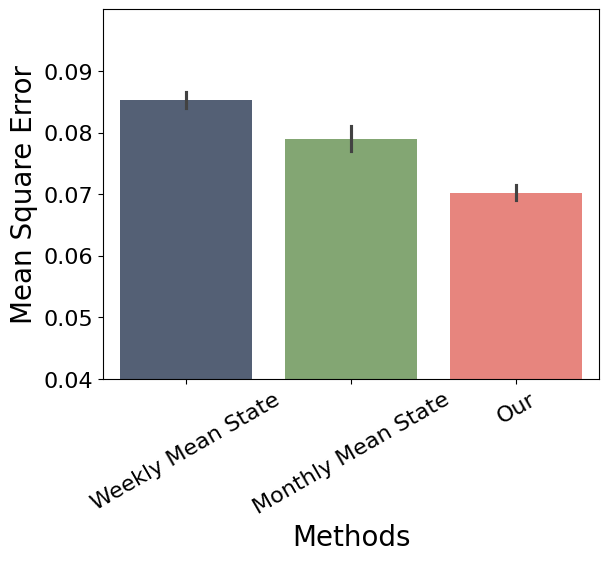

In [13]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

category = []
category.extend(['Weekly Mean State' for i in range(4325)])
category.extend(['Monthly Mean State' for i in range(4325)])
category.extend(['Our' for i in range(4325)])
print(np.nanmean(mse_weekly))
print(np.nanmean(mse_monthly))
print(np.nanmean(mse_our))
data = {'mse': np.concatenate([ mse_weekly.numpy(), mse_monthly.numpy(), mse_our.numpy()],0),
        'methods':category}
        # 'imputation':imputation}
data = pd.DataFrame.from_dict(data)
plt.xticks(rotation=30,fontsize=16)
plt.ylim(0.04,0.10)
plt.yticks([0.04,0.05,0.06,0.07,0.08,0.09],fontsize=16)
plt.xlabel("Methods",fontsize=20)
plt.ylabel("Mean Square Error", fontsize=20)
color = ["#F8766D", "#80AE6B", "#4E5E7B"][::-1]
print(color)

sns.barplot(x="methods", y="mse", data=data, palette=color)
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)
# plt.xticks([])

In [14]:
mae_our= ((np.abs(prediction_our.mean(1)- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_our))


mae_weekly = ((np.abs(prediction_weekly - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_monthly = ((np.abs(prediction_monthly - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
print(np.nanmean(mae_weekly))
print(np.nanmean(mae_monthly))


0.19564027
0.21751725238377978
0.20831942264104245


In [15]:
mae_our[mae_our==0]=np.nan
mae_weekly[mae_weekly==0]=np.nan
mae_monthly[mae_monthly==0]=np.nan

0.19564027
0.21751725238377978
0.20831942264104245


/tmp/ipykernel_160559/96548801.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='methods', y='mae', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={


([], [])

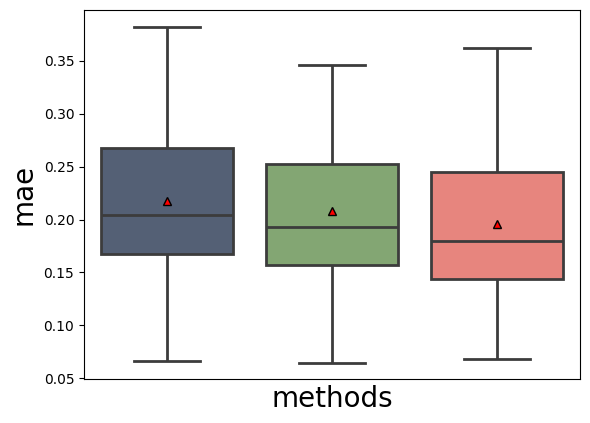

In [16]:
import pandas as pd
import numpy as np
category = []
category.extend(['Weekly Mean State' for i in range(4325)])
category.extend(['Monthly Mean State' for i in range(4325)])
category.extend(['Our' for i in range(4325)])
data = {'mae': np.concatenate([ mae_weekly.numpy(), mae_monthly.numpy(),   mae_our.numpy()],0),
        'methods':category}
        # 'imputation':imputation}
data = pd.DataFrame.from_dict(data)
plt.xticks(rotation=30)
print(np.nanmean(mae_our))
print(np.nanmean(mae_weekly))
print(np.nanmean(mae_monthly))
# color= sns.color_palette()[:7][::-1]
color = ["#F8766D", "#80AE6B", "#4E5E7B"][::-1]
g = sns.boxplot(x='methods', y='mae', linewidth=2,showfliers=False,showmeans=True,data=data,palette=color, meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)
plt.xticks([])

0.21751725238377978
0.20831942264104245
0.19564027
['#4E5E7B', '#80AE6B', '#F8766D']


/tmp/ipykernel_160559/1695733137.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="methods", y="mae", data=data, palette=color)


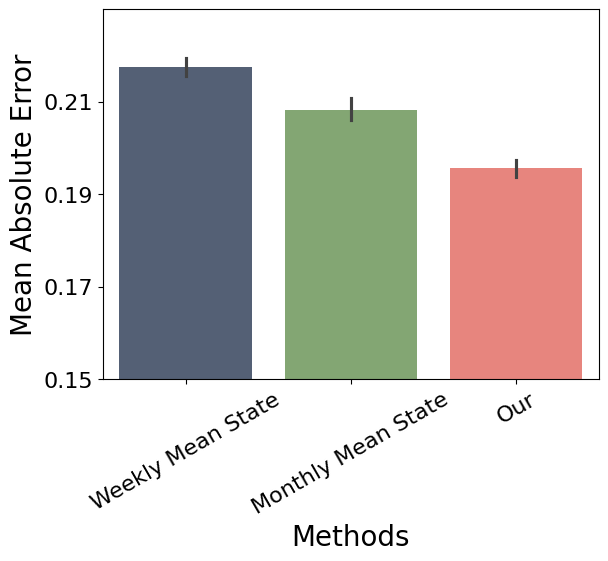

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

category = []
category.extend(['Weekly Mean State' for i in range(4325)])
category.extend(['Monthly Mean State' for i in range(4325)])
category.extend(['Our' for i in range(4325)])
print(np.nanmean(mae_weekly))
print(np.nanmean(mae_monthly))
print(np.nanmean(mae_our))
data = {'mae': np.concatenate([ mae_weekly.numpy(), mae_monthly.numpy(), mae_our.numpy()],0),
        'methods':category}
        # 'imputation':imputation}
data = pd.DataFrame.from_dict(data)
plt.xticks(rotation=30,fontsize=16)
plt.ylim(0.15,0.23)
plt.yticks([0.15,0.17,0.19, 0.21],fontsize=16)
plt.xlabel("Methods",fontsize=20)
plt.ylabel("Mean Absolute Error", fontsize=20)
color = ["#F8766D", "#80AE6B", "#4E5E7B"][::-1]
print(color)

sns.barplot(x="methods", y="mae", data=data, palette=color)
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)

In [ ]:
improvement = mse_our/mse_weekly

In [ ]:
np.set_printoptions(threshold = np.inf)
print(np.argsort(improvement)[:500])

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive

fig, ax= plt.subplots(figsize=(6, 4),
                         subplot_kw={'projection': ccrs.PlateCarree()})

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


lat1 = np.nanmin(lat)
lat2 = np.nanmax(lat)
lon1 = np.nanmin(lon)
lon2 = np.nanmax(lon)

# 遍历每个子图
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
tmp = np.zeros((60,96))
is_sea = np.load("/home/mafzhang/code/Project/STIMP/data/PRE/is_sea.npy")
is_sea2 = np.load("/home/mafzhang/code/Project/STIMP/data/PRE/is_sea_new.npy")
tmp[is_sea.astype(bool)] = improvement
tmp[~is_sea2.astype(bool)] = np.nan

# 添加基础地理特征
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.8)
ax.add_feature(cfeature.OCEAN, facecolor='#d0e0f0')
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='#d0e0f0')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='#004d99')

contourf = ax.contourf(lon, lat, (1-tmp)*100, 
                        levels=np.linspace(0, 50, 40),
                        cmap=cm,    # 颜色映射
                        transform=ccrs.PlateCarree(),extend="both")

cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # 增大 height 的值，使 colorbar 更宽
cbar = fig.colorbar(contourf, ticks=[0,25,50], cax=cbar_ax,orientation='horizontal', label='improvement (%)')

plt.show()

In [ ]:
improvement = mse_our/mse_monthly
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from cmap import Colormap

cm = Colormap('vispy:fire').to_mpl()  # case insensitive
fig, ax= plt.subplots(figsize=(6, 4),
                         subplot_kw={'projection': ccrs.PlateCarree()})

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


lat1 = np.nanmin(lat)
lat2 = np.nanmax(lat)
lon1 = np.nanmin(lon)
lon2 = np.nanmax(lon)

# 遍历每个子图
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
tmp = np.zeros((60,96))
is_sea = np.load("/home/mafzhang/code/Project/STIMP/data/PRE/is_sea.npy")
is_sea2 = np.load("/home/mafzhang/code/Project/STIMP/data/PRE/is_sea_new.npy")
tmp[is_sea.astype(bool)] = improvement
tmp[~is_sea2.astype(bool)] = np.nan

# 添加基础地理特征
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.8)
ax.add_feature(cfeature.OCEAN, facecolor='#d0e0f0')
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='#d0e0f0')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='#004d99')

contourf = ax.contourf(lon, lat, (1-tmp)*100, 
                        levels=np.linspace(0, 50, 40),
                        cmap=cm,    # 颜色映射
                        transform=ccrs.PlateCarree(), extend='both')

cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # 增大 height 的值，使 colorbar 更宽
cbar = fig.colorbar(contourf, ticks=[0, 25, 50], cax=cbar_ax,orientation='horizontal', label='improvement (%)')

plt.show()